# **User Engagement Analysis**

# **Exploratory Data Analysis**

Importation of Python libraries and the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

data = pd.read_csv("/content/bounce-rate.csv")
print(data)

        Client ID  Sessions Avg. Session Duration Bounce Rate
0    5.778476e+08       367              00:01:35      87.19%
1    1.583822e+09       260              00:01:04      29.62%
2    1.030699e+09       237              00:00:02      99.16%
3    1.025030e+09       226              00:02:22      25.66%
4    1.469968e+09       216              00:01:23      46.76%
..            ...       ...                   ...         ...
994  1.049263e+09        17              00:07:44      41.18%
995  1.145806e+09        17              00:05:37      47.06%
996  1.153811e+09        17              00:00:12      94.12%
997  1.182133e+09        17              00:01:13      88.24%
998  1.184187e+09        17              00:02:34      64.71%

[999 rows x 4 columns]


Checking null values in the dataset befoe moving forward:

In [3]:
print(data.isnull().sum())

Client ID                0
Sessions                 0
Avg. Session Duration    0
Bounce Rate              0
dtype: int64


Checking the dataset Column for insights:

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              999 non-null    float64
 1   Sessions               999 non-null    int64  
 2   Avg. Session Duration  999 non-null    object 
 3   Bounce Rate            999 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.3+ KB
None


From the above we see that the Avg. Session Duration and Bounce Rate columns are not numerical. We need to convert them into appropriate data types for this task.

Converting the Avg. Session Duration and Bounce Rate columns to numerical

In [5]:
data['Avg. Session Duration'] = data['Avg. Session Duration'].str[1:]
data['Avg. Session Duration'] = pd.to_timedelta(data['Avg. Session Duration'])
data['Avg. Session Duration'] = data['Avg. Session Duration'] / pd.Timedelta(minutes=1)
data['Bounce Rate'] = data['Bounce Rate'].str.rstrip('%').astype('float')
print(data)

        Client ID  Sessions  Avg. Session Duration  Bounce Rate
0    5.778476e+08       367               1.583333        87.19
1    1.583822e+09       260               1.066667        29.62
2    1.030699e+09       237               0.033333        99.16
3    1.025030e+09       226               2.366667        25.66
4    1.469968e+09       216               1.383333        46.76
..            ...       ...                    ...          ...
994  1.049263e+09        17               7.733333        41.18
995  1.145806e+09        17               5.616667        47.06
996  1.153811e+09        17               0.200000        94.12
997  1.182133e+09        17               1.216667        88.24
998  1.184187e+09        17               2.566667        64.71

[999 rows x 4 columns]


In the above code, I removed the first character from each value in the “Avg. Session Duration” column, representing a unit of time. Then, I converted the values in the “Avg. Session Duration” column to a standardized time delta format, representing time durations. Then, I further converted the time delta values to minutes, providing the average session duration in a numeric format. Similarly, I removed the percentage sign from each value in the “Bounce Rate” column and converted them to float values, representing the bounce rate as decimals.

Checking the descriptive statistics of the data:

In [6]:
print(data.describe())

          Client ID    Sessions  Avg. Session Duration  Bounce Rate
count  9.990000e+02  999.000000             999.000000   999.000000
mean   1.036401e+09   32.259259               3.636520    65.307978
std    6.151503e+08   24.658588               4.040562    22.997270
min    1.849182e+05   17.000000               0.000000     4.880000
25%    4.801824e+08   21.000000               0.891667    47.370000
50%    1.029507e+09   25.000000               2.466667    66.670000
75%    1.587982e+09   35.000000               4.816667    85.190000
max    2.063338e+09  367.000000              30.666667   100.000000


Before moving foward, Lets look at the correlation matrix

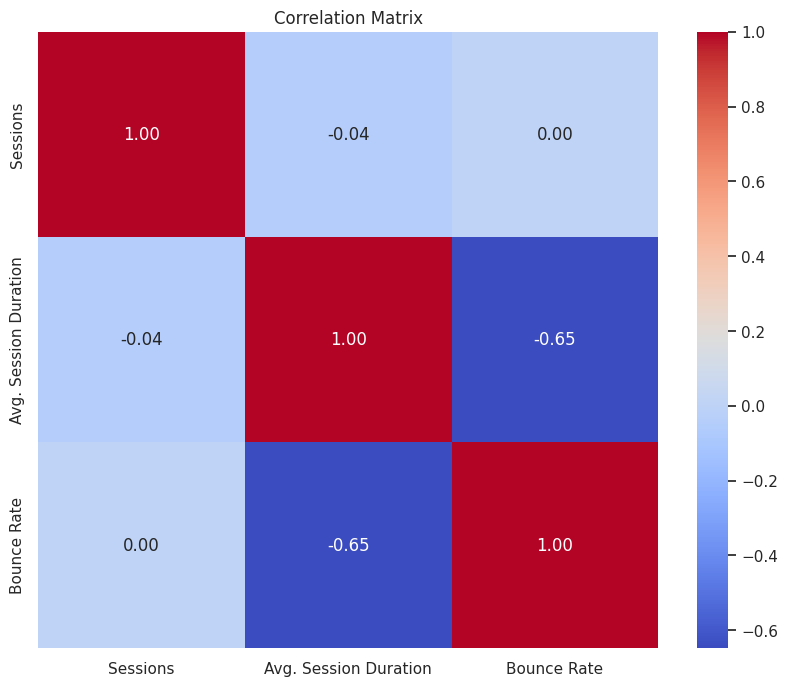

In [8]:
# Exclude 'Client Id' column from the dataset
data_without_id = data.drop('Client ID', axis=1)

# Calculate the correlation matrix
correlation_matrix = data_without_id.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

# **Data Analysis and Visualization**

# **Analyzing Bounce Rates**

Let’s analyze the bounce rate of users to understand user engagement.

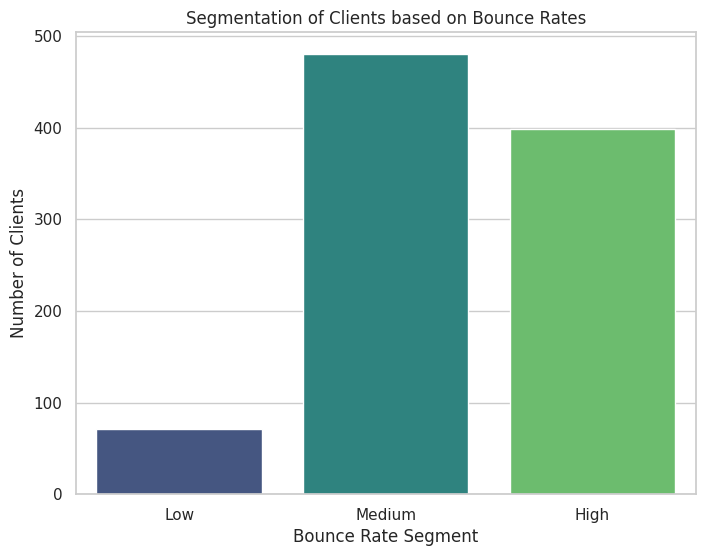

In [9]:
# Define the thresholds for high, medium, and low bounce rates
high_bounce_rate_threshold = 70
low_bounce_rate_threshold = 30

# Segment the clients based on bounce rates
data['Bounce Rate Segment'] = pd.cut(data['Bounce Rate'],
                                     bins=[0, low_bounce_rate_threshold,
                                           high_bounce_rate_threshold, 100],
                                     labels=['Low', 'Medium', 'High'], right=False)

# Count the number of clients in each segment
segment_counts = data['Bounce Rate Segment'].value_counts().sort_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")

# Set plot title and labels
plt.title('Segmentation of Clients based on Bounce Rates')
plt.xlabel('Bounce Rate Segment')
plt.ylabel('Number of Clients')

# Show the plot
plt.show()

I created bounce rate segments and analyzed the number of users in each segment in the above code.

Now let’s have a look at the average session duration of the users in each bounce rate segment:

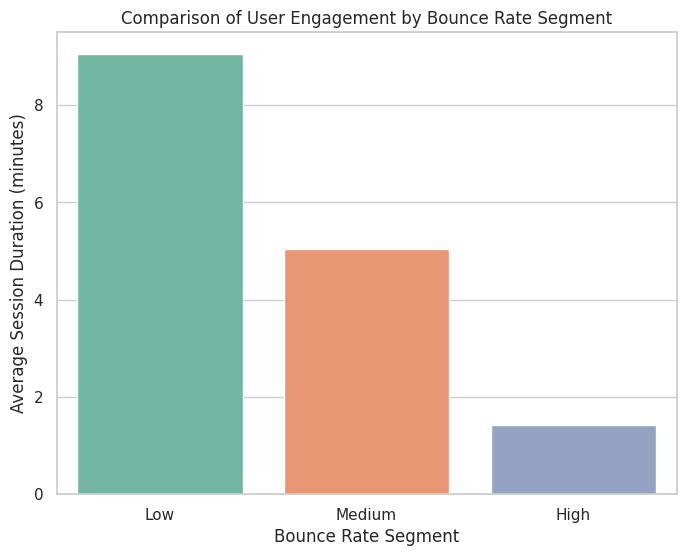

In [10]:
# Calculate the average session duration for each segment
segment_avg_duration = data.groupby('Bounce Rate Segment')['Avg. Session Duration'].mean().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Bounce Rate Segment', y='Avg. Session Duration', data=segment_avg_duration, palette="Set2")

# Set plot title and labels
plt.title('Comparison of User Engagement by Bounce Rate Segment')
plt.xlabel('Bounce Rate Segment')
plt.ylabel('Average Session Duration (minutes)')

# Show the plot
plt.show()

From the above it indicated that users with low bounce rates have an average session duration of about 9.05 minutes on the website, while users with high bounce rates have an average session duration of only 1.43 minutes.

Now let’s have a look at the top 10 loyal users according to the number of sessions and average session duration:

In [11]:
# Calculate the total session duration for each client
data['Total Session Duration'] = data['Sessions'] * data['Avg. Session Duration']

# Sort the DataFrame by the total session duration in descending order
df_sorted = data.sort_values('Total Session Duration', ascending=False)

# the top 10 most loyal users
df_sorted.head(10)

,Client ID,Sessions,Avg. Session Duration,Bounce Rate,Bounce Rate Segment,Total Session Duration
20,1.884620e+09,93,30.666667,16.13,Low,2852.000000
54,1.041722e+09,67,20.500000,22.39,Low,1373.500000
262,8.756557e+08,34,29.966667,26.47,Low,1018.866667
10,1.461865e+09,117,8.450000,48.72,Medium,988.650000
173,1.849182e+05,40,24.416667,17.50,Low,976.666667
15,1.049234e+09,99,9.716667,34.34,Medium,961.950000
310,2.026953e+09,31,22.116667,35.48,Medium,685.616667
24,1.903206e+09,90,7.016667,36.67,Medium,631.500000
211,2.054569e+09,37,16.250000,35.14,Medium,601.250000
402,6.220935e+08,28,21.300000,39.29,Medium,596.400000


Now let’s have a look at the relationship between the average session duration and the bounce rates:

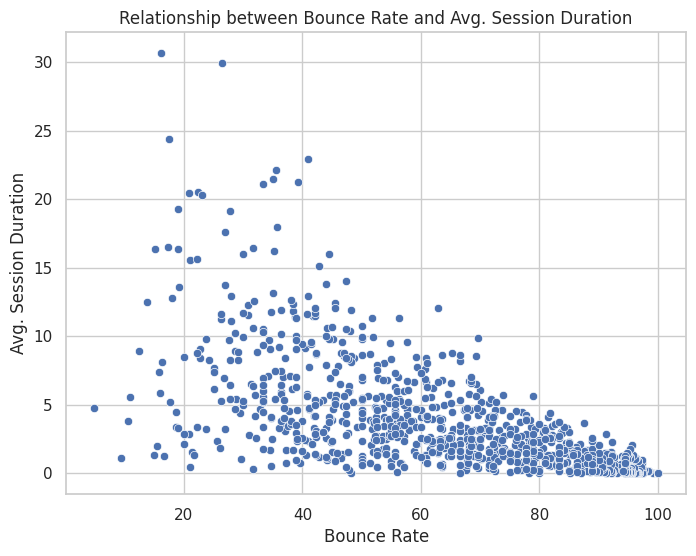

In [16]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Bounce Rate', y='Avg. Session Duration')

# Set plot title and labels
plt.title('Relationship between Bounce Rate and Avg. Session Duration')
plt.xlabel('Bounce Rate')
plt.ylabel('Avg. Session Duration')

# Show the plot
plt.show()

So there is a negative linear relationship between the average session duration and bounce rates (which is ideal here). It means a high number of average session duration results in lower bounce rates.

Now let’s analyze user engagement

I created a retention segments based on the number of sessions:

In [13]:
# Define the retention segments based on number of sessions
def get_retention_segment(row):
    if row['Sessions'] >= 32: # 32 is mean of sessions
        return 'Frequent Users'
    else:
        return 'Occasional Users'

# Create a new column for retention segments
data['Retention Segment'] = data.apply(get_retention_segment, axis=1)

# Print the updated DataFrame
print(data)

        Client ID  Sessions  Avg. Session Duration  Bounce Rate  \
0    5.778476e+08       367               1.583333        87.19   
1    1.583822e+09       260               1.066667        29.62   
2    1.030699e+09       237               0.033333        99.16   
3    1.025030e+09       226               2.366667        25.66   
4    1.469968e+09       216               1.383333        46.76   
..            ...       ...                    ...          ...   
994  1.049263e+09        17               7.733333        41.18   
995  1.145806e+09        17               5.616667        47.06   
996  1.153811e+09        17               0.200000        94.12   
997  1.182133e+09        17               1.216667        88.24   
998  1.184187e+09        17               2.566667        64.71   

    Bounce Rate Segment  Total Session Duration Retention Segment  
0                  High              581.083333    Frequent Users  
1                   Low              277.333333    Frequent

The above function takes a row of data as input. It assigns a retention segment based on the number of sessions for each row. If the number of sessions is greater than or equal to 32 (which is the mean of sessions), the function returns ‘Frequent Users’. Otherwise, it returns ‘Occasional Users’.

Now let’s have a look at the average bounce rate by retention segment:

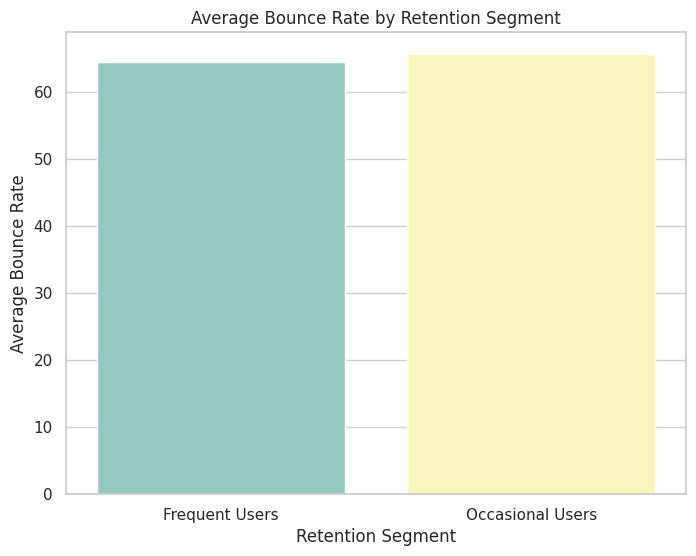

In [14]:
# Calculate the average bounce rate for each retention segment
segment_bounce_rates = data.groupby('Retention Segment')['Bounce Rate'].mean().reset_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Retention Segment', y='Bounce Rate', data=segment_bounce_rates, palette="Set3")

# Set plot title and labels
plt.title('Average Bounce Rate by Retention Segment')
plt.xlabel('Retention Segment')
plt.ylabel('Average Bounce Rate')

# Show the plot
plt.show()

So, there’s not much difference between the average bounce rates of frequent and occasional users.

Now let’s have a look at the percentage of retained users:

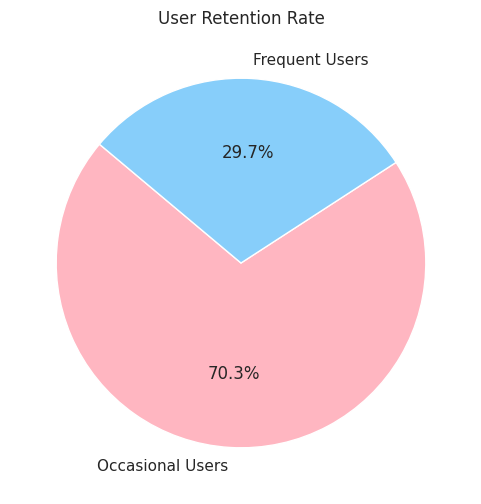

In [15]:
# Count the number of users in each retention segment
segment_counts = data['Retention Segment'].value_counts()

# Define the pastel colors
colors = ['#FFB6C1', '#87CEFA']

# Create a pie chart using Matplotlib
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('User Retention Rate')

# Show the chart
plt.show()

In the data of 1000 users, the platform retained 29.7% of users (297 users) who frequently visit the platform. This retention rate is not bad at all.